IMPORT LIBRARY

In [28]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

IMPORT DATA

In [30]:
df = pd.read_csv("train.csv")
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,47,male,2,free,NaN,little,8335,36,car,1
1,38,male,2,own,little,NaN,804,12,radio/TV,0
2,28,male,2,own,little,little,5371,36,furniture/equipment,0
3,29,female,0,own,NaN,moderate,3990,36,domestic appliances,0
4,24,female,2,own,NaN,moderate,8487,48,car,0
...,...,...,...,...,...,...,...,...,...,...
795,27,female,2,own,moderate,NaN,1237,6,radio/TV,0
796,43,male,2,free,little,little,1333,24,car,1
797,43,male,2,own,little,NaN,2515,18,furniture/equipment,0
798,23,female,2,rent,NaN,little,8471,18,education,0


In [31]:
print("Number of columns:", df.shape[1], "\nNumber of rows:", df.shape[0])

Number of columns: 10 
Number of rows: 800


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int64 
 1   Sex               800 non-null    object
 2   Job               800 non-null    int64 
 3   Housing           800 non-null    object
 4   Saving accounts   656 non-null    object
 5   Checking account  484 non-null    object
 6   Credit amount     800 non-null    int64 
 7   Duration          800 non-null    int64 
 8   Purpose           800 non-null    object
 9   Risk              800 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 62.6+ KB


In [33]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     144
Checking account    316
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [34]:
def unique_value(df):
    print("-----------Unique values in dataframe-----------")
    features = df.columns
    for feature in features:
        values = df[feature].unique().reshape(-1)
        print(feature + ":", end=" ")
        for i in range(len(values) - 1):
            print(values[i], end="; ")
        print(values[-1])
        print()

In [35]:
unique_value(df)

-----------Unique values in dataframe-----------
Age: 47; 38; 28; 29; 24; 35; 60; 32; 36; 23; 34; 45; 31; 22; 46; 30; 25; 27; 26; 40; 50; 37; 49; 33; 42; 74; 51; 55; 39; 41; 43; 21; 61; 20; 58; 67; 66; 57; 54; 48; 62; 64; 44; 53; 52; 56; 63; 70; 59; 19; 65; 75; 68

Sex: male; female

Job: 2; 0; 3; 1

Housing: free; own; rent

Saving accounts: nan; little; moderate; rich; quite rich

Checking account: little; nan; moderate; rich

Credit amount: 8335; 804; 5371; 3990; 8487; 2346; 6468; 701; 12169; 836; 2578; 4249; 3835; 1410; 3650; 1514; 2606; 1747; 2251; 1820; 1048; 6999; 7582; 2303; 3763; 1278; 1924; 2327; 3509; 2406; 2930; 2812; 1449; 929; 2333; 1597; 2108; 1236; 2390; 1228; 3590; 2022; 691; 866; 1778; 4811; 1934; 1092; 1882; 2760; 2384; 841; 3804; 1965; 2121; 3518; 4526; 1858; 1164; 1555; 2687; 3913; 11938; 888; 1516; 6568; 8386; 1274; 7057; 1533; 1941; 1872; 1393; 4241; 11560; 4370; 6289; 2671; 2576; 1953; 3349; 1433; 3973; 2522; 585; 1867; 1471; 4583; 2439; 4576; 3447; 1169; 3832; 

In [36]:
customers = df.copy()


Replace NaN value in dataframe to 'nan' value

In [37]:
customers = customers.replace(np.nan, "nan")
customers.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                 int64
dtype: object

In [38]:
unique_value(customers)

-----------Unique values in dataframe-----------
Age: 47; 38; 28; 29; 24; 35; 60; 32; 36; 23; 34; 45; 31; 22; 46; 30; 25; 27; 26; 40; 50; 37; 49; 33; 42; 74; 51; 55; 39; 41; 43; 21; 61; 20; 58; 67; 66; 57; 54; 48; 62; 64; 44; 53; 52; 56; 63; 70; 59; 19; 65; 75; 68

Sex: male; female

Job: 2; 0; 3; 1

Housing: free; own; rent

Saving accounts: NONE; little; moderate; rich; quite rich

Checking account: little; NONE; moderate; rich

Credit amount: 8335; 804; 5371; 3990; 8487; 2346; 6468; 701; 12169; 836; 2578; 4249; 3835; 1410; 3650; 1514; 2606; 1747; 2251; 1820; 1048; 6999; 7582; 2303; 3763; 1278; 1924; 2327; 3509; 2406; 2930; 2812; 1449; 929; 2333; 1597; 2108; 1236; 2390; 1228; 3590; 2022; 691; 866; 1778; 4811; 1934; 1092; 1882; 2760; 2384; 841; 3804; 1965; 2121; 3518; 4526; 1858; 1164; 1555; 2687; 3913; 11938; 888; 1516; 6568; 8386; 1274; 7057; 1533; 1941; 1872; 1393; 4241; 11560; 4370; 6289; 2671; 2576; 1953; 3349; 1433; 3973; 2522; 585; 1867; 1471; 4583; 2439; 4576; 3447; 1169; 3832

In [39]:
customers.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [40]:
categorical_cols = ['Age','Sex','Job','Housing','Saving accounts', 'Checking account','Purpose']
numerical_cols = ['Credit amount', 'Duration']
customers.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                 int64
dtype: object

In [41]:
customers.dtypes


Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                 int64
dtype: object

In [42]:
def _bar_plot(df, feature):
    pd.DataFrame(df[feature].value_counts()).plot(kind='bar', figsize=(30, 5),fontsize=20)

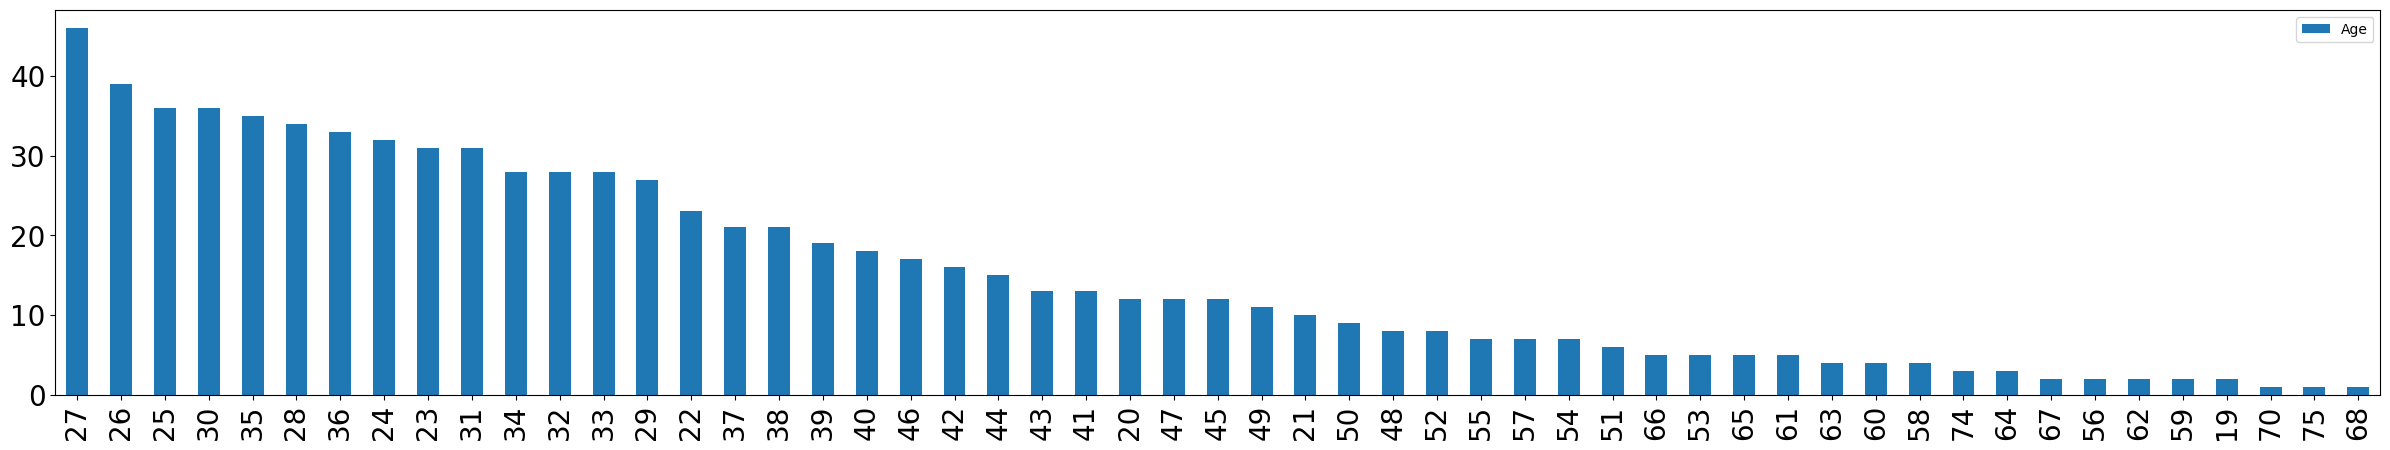

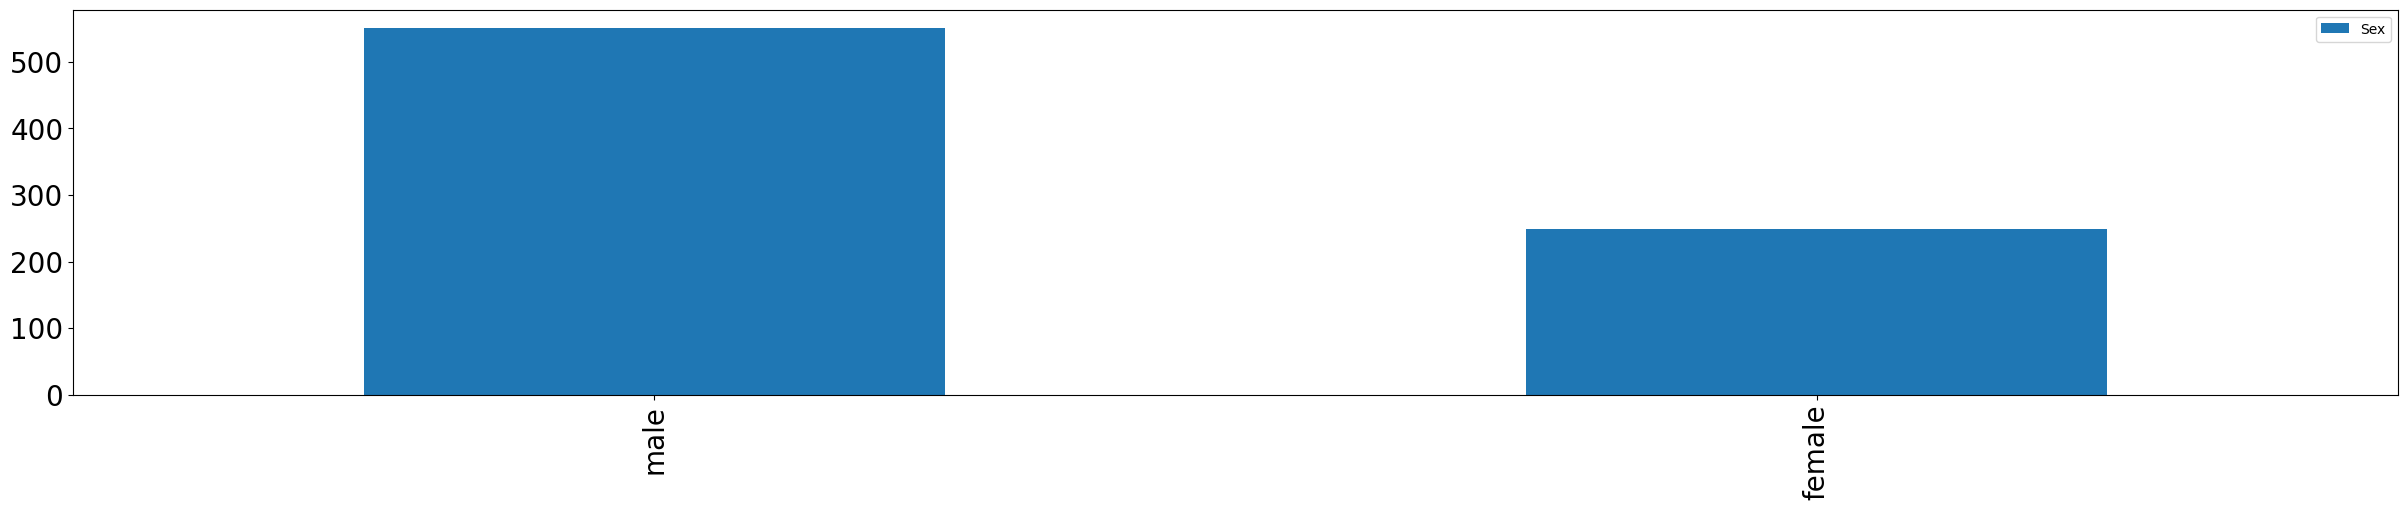

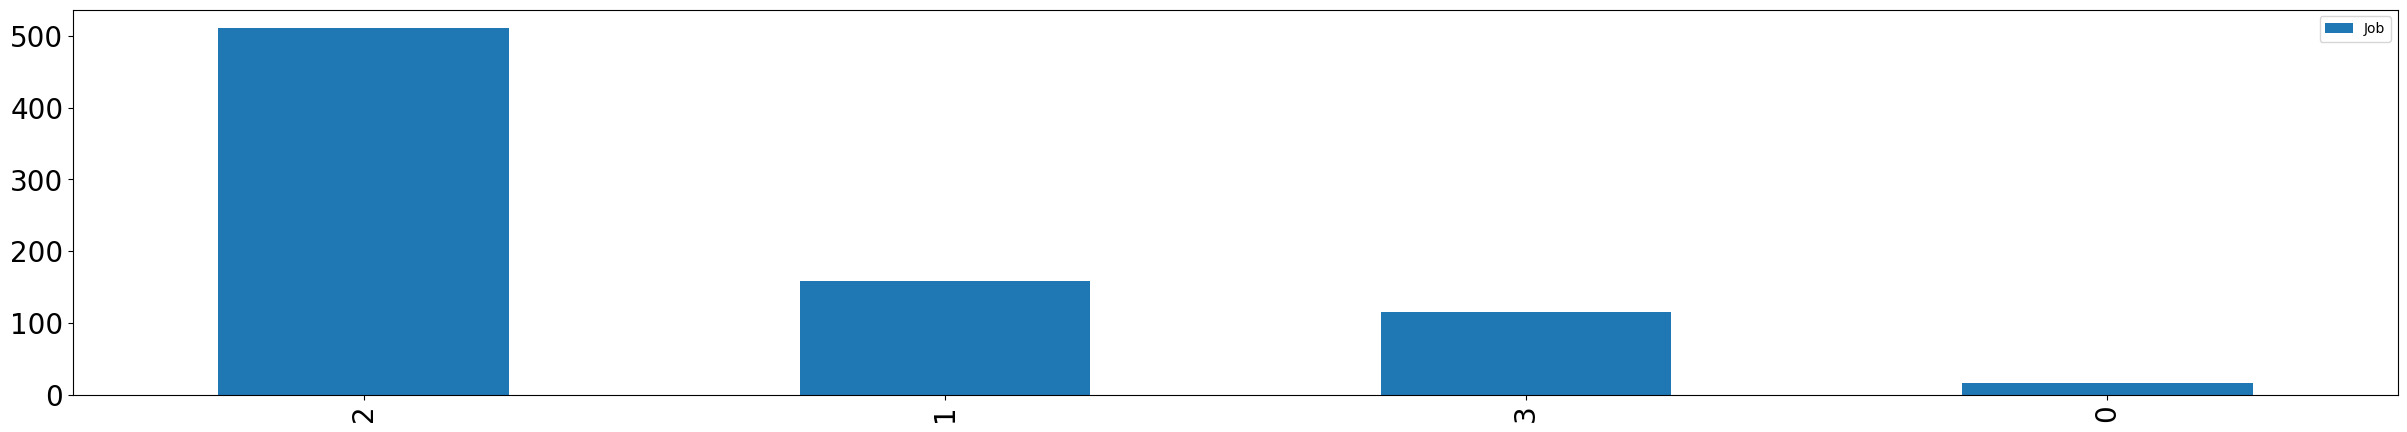

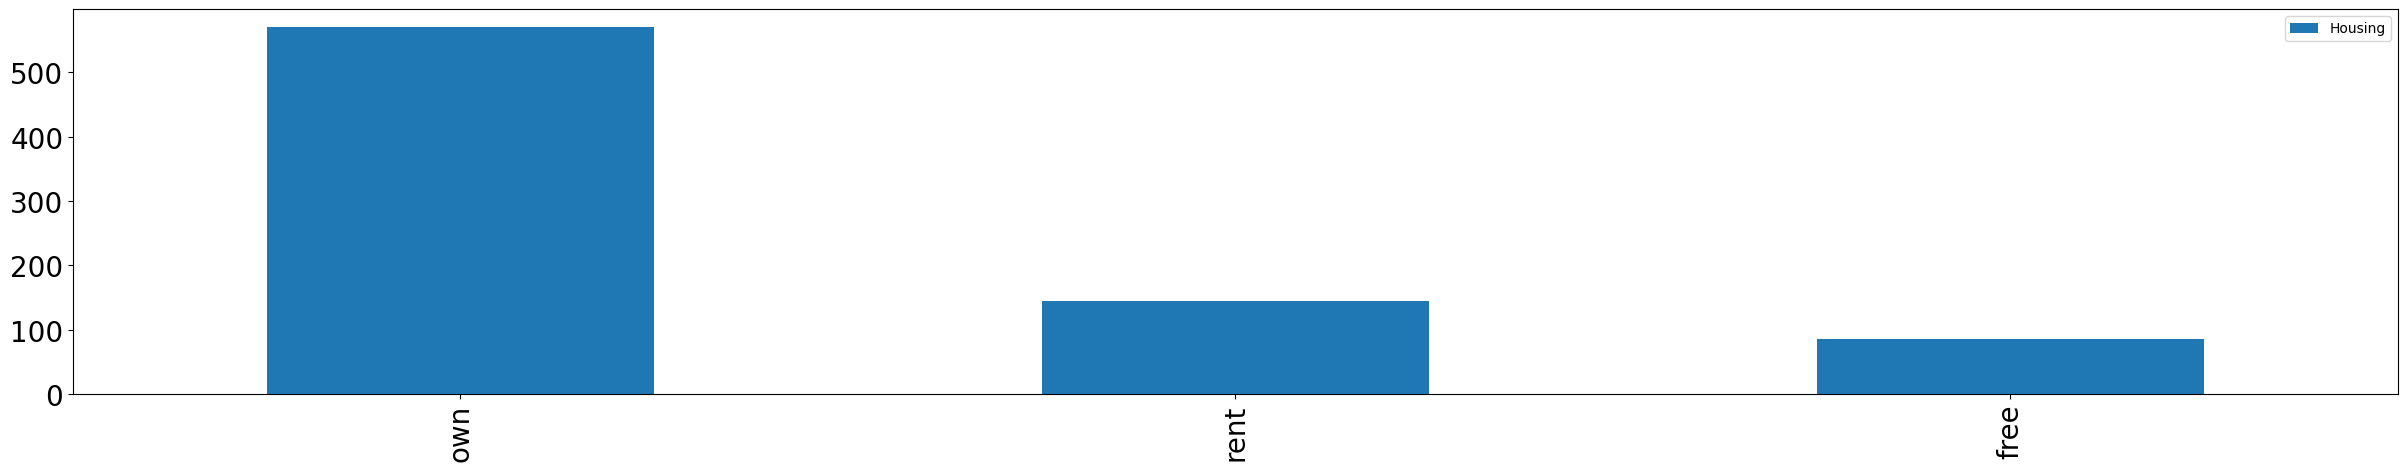

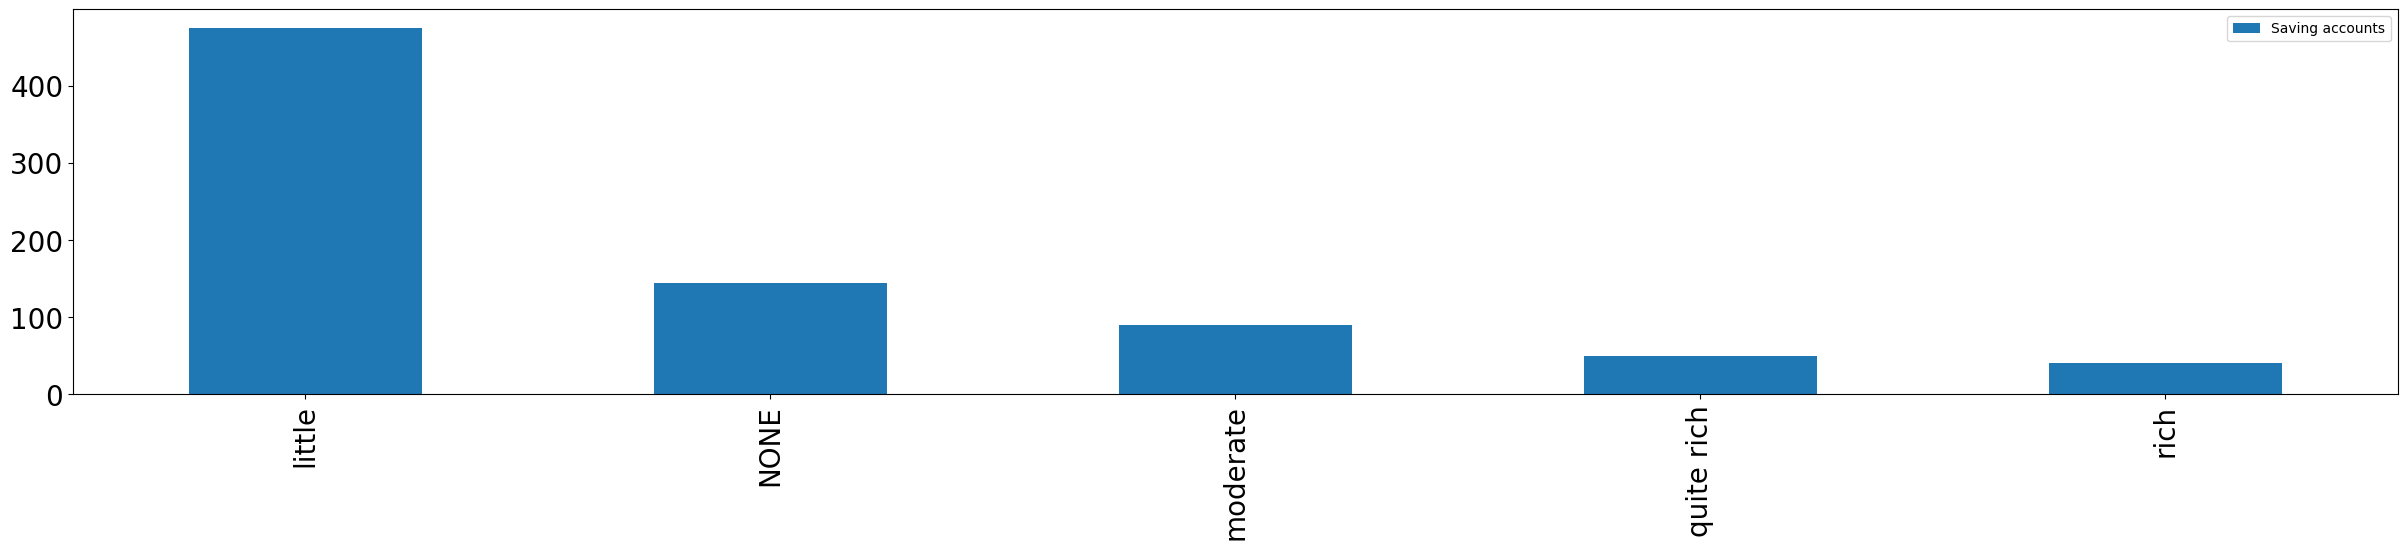

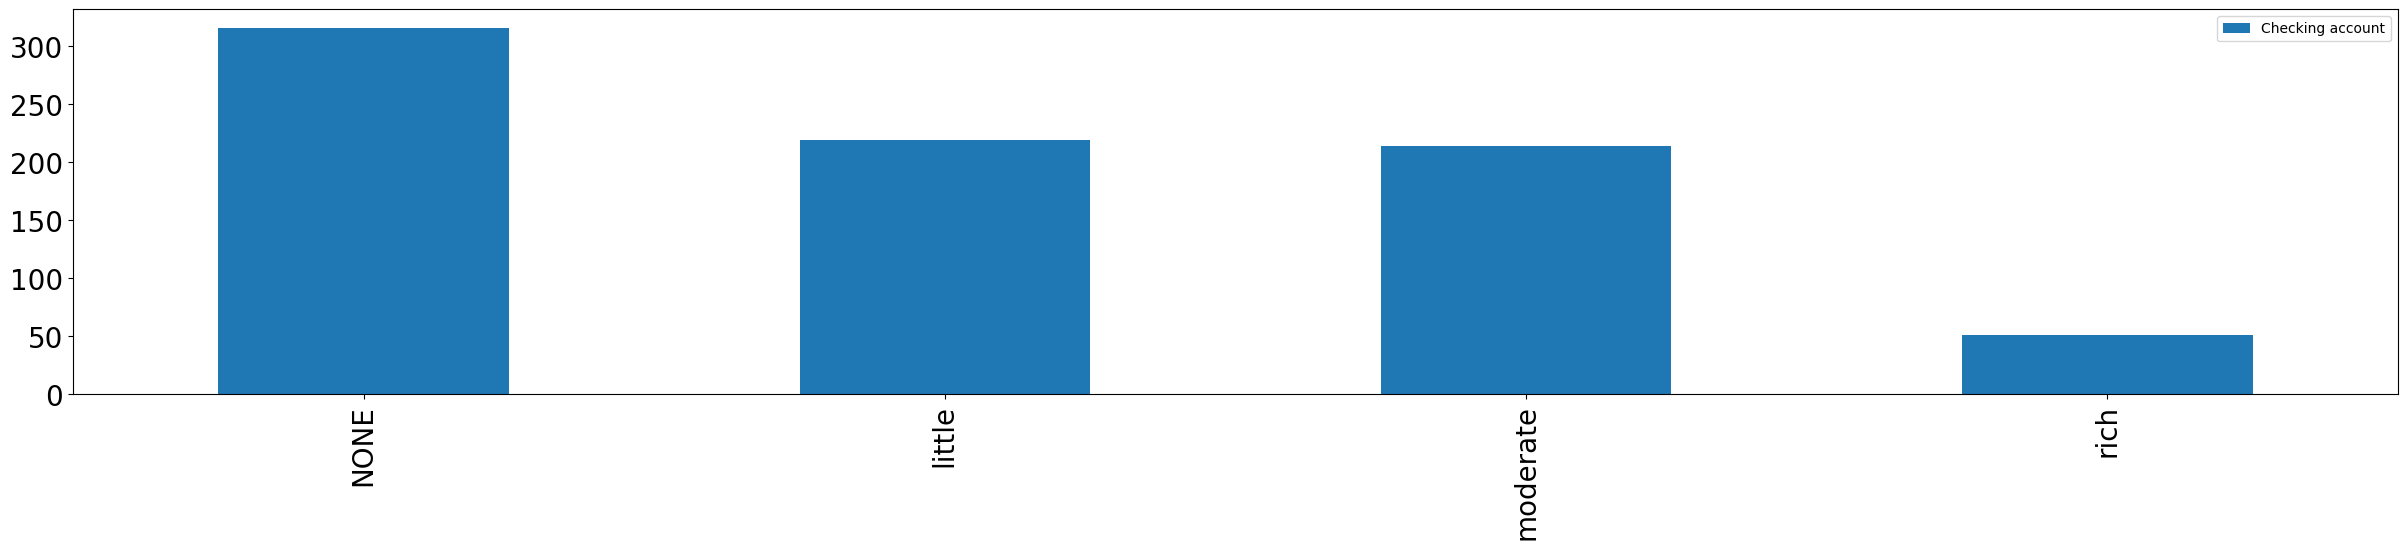

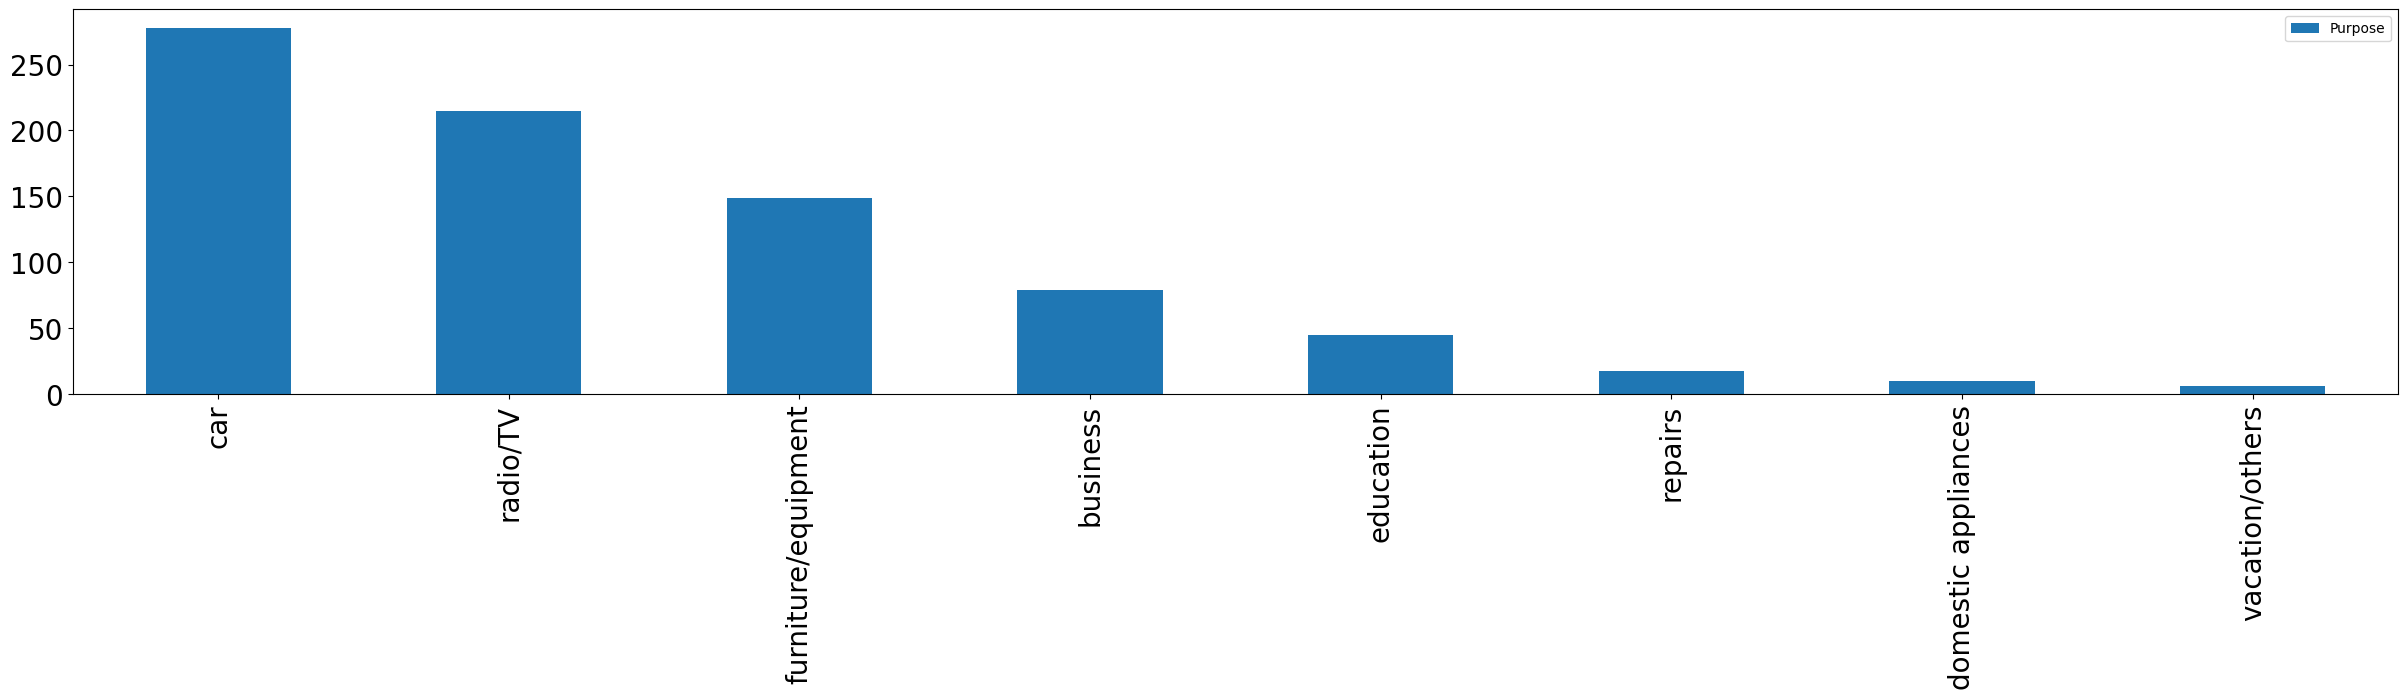

In [43]:
for col in categorical_cols:
    _bar_plot(customers, col)

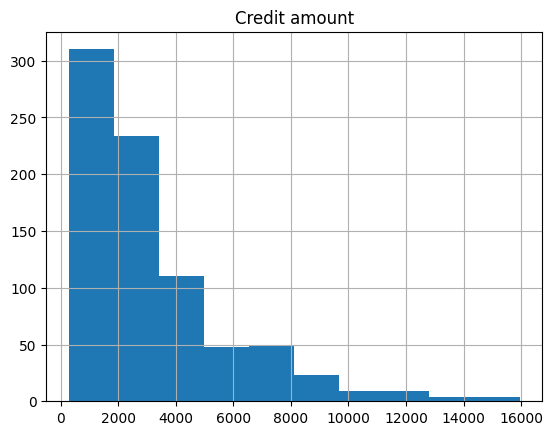

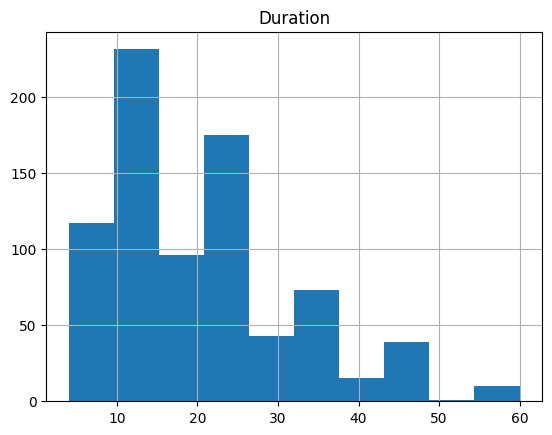

In [44]:
for col in numerical_cols:
  customers[col].hist()
  plt.title(col)
  plt.show()

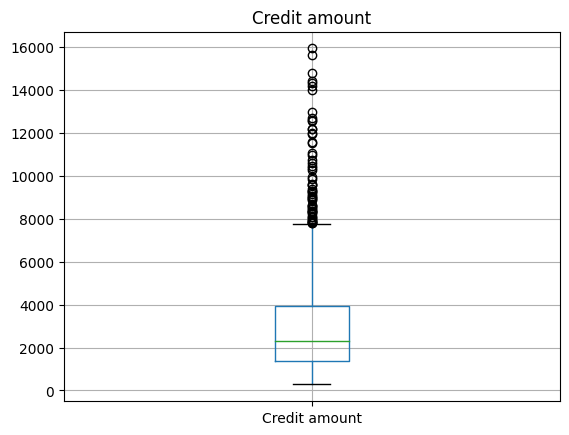

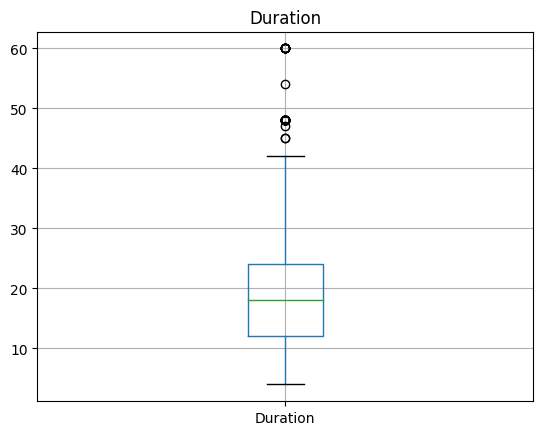

In [45]:
for col in numerical_cols:
  customers.boxplot(column=[col])
  plt.title(col)
  plt.show()

In [48]:
corr = customers[numerical_cols].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12284\4273581110.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Credit amount,Duration
Credit amount,1.00,0.64
Duration,0.64,1.00


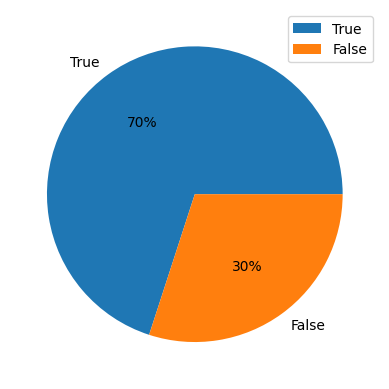

In [49]:
true_labels = customers[customers["Risk"] == 0]['Risk'].count()
false_labels = customers[customers["Risk"] == 1]['Risk'].count()
plt.pie(np.array([true_labels, false_labels]), labels = ["True", "False"], autopct='%1.0f%%')
plt.legend()
plt.show() 

In [50]:
print("True", true_labels)
print("False", false_labels)

True 560
False 240


In [51]:
def bar_plot(df, feature, target = 'Risk'):
    temp_df = pd.DataFrame(df.groupby(feature).agg(
        Yes = (target, lambda x: sum(x == 0)),
        No = (target, lambda x: sum(x == 1))
        )
    )

    temp_df = temp_df.reset_index()

    X_axis = np.arange(len(temp_df[feature]))

    plt.figure(figsize=(10,3))
    plt.bar(X_axis - 0.2, temp_df['Yes'], 0.4, label = 'No Risky')
    plt.bar(X_axis + 0.2, temp_df['No'], 0.4, label = 'Risky')
    
    plt.xticks(X_axis, temp_df[feature])
    plt.xlabel(feature)
    plt.ylabel("Number of " + target)
    plt.title("Number of " + target + " by " + feature)
    plt.legend()
    plt.show()


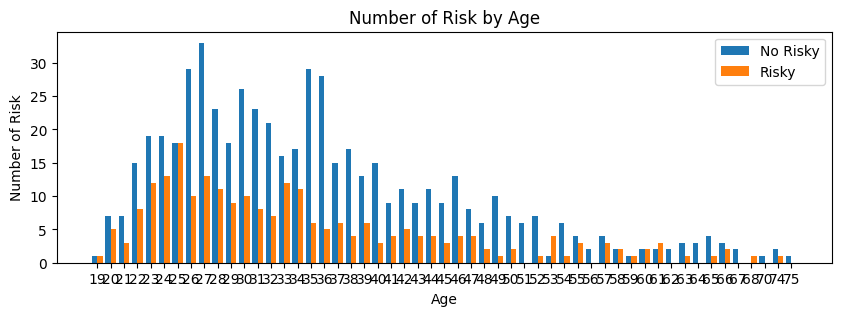

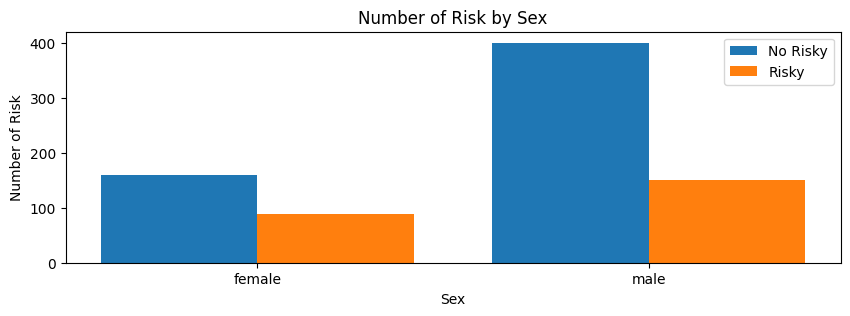

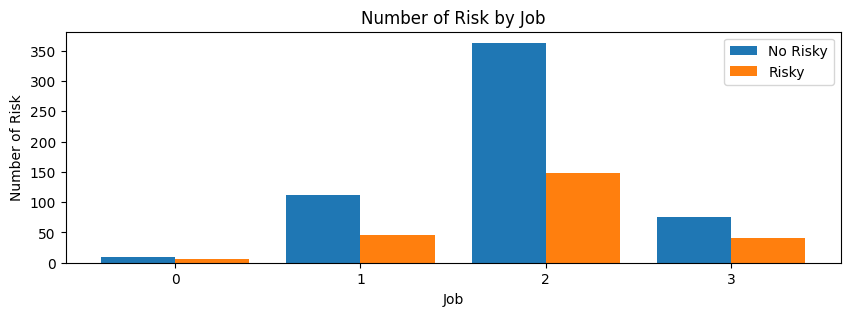

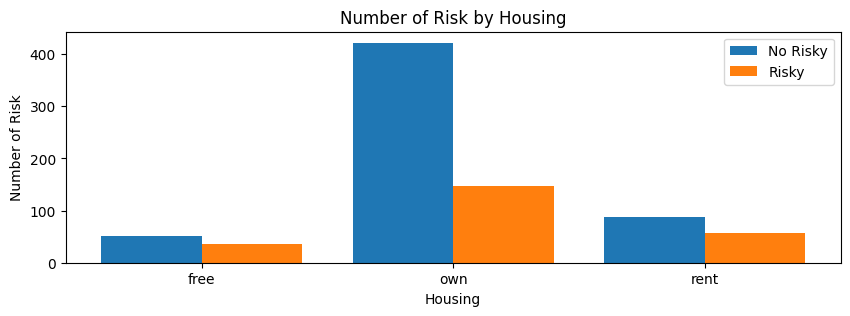

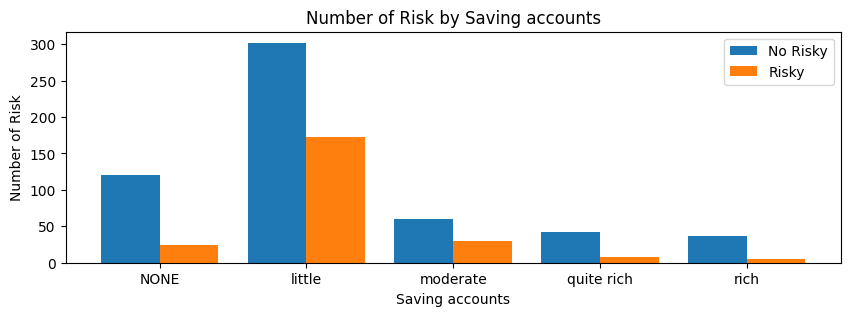

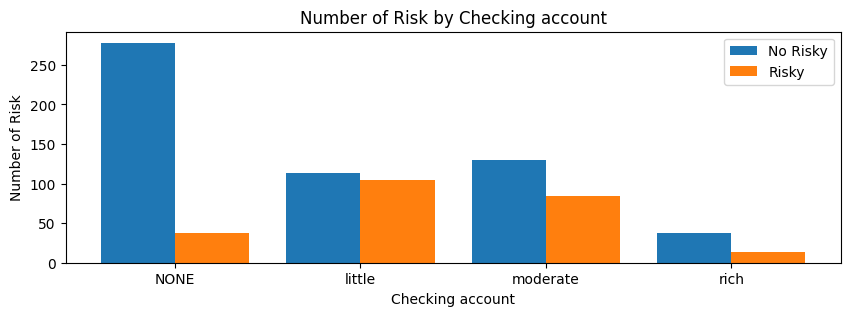

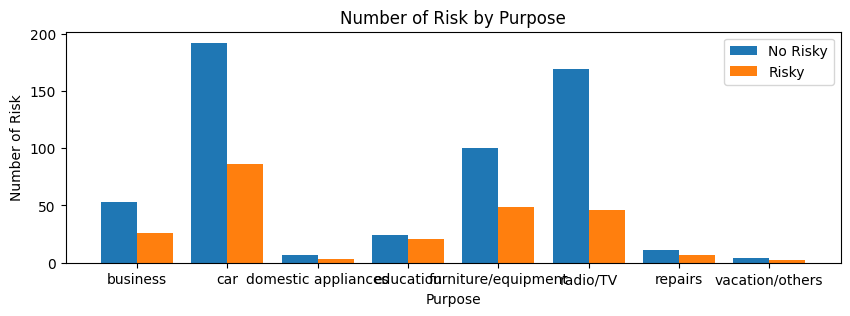

In [52]:
for col in categorical_cols:
    bar_plot(customers, col)

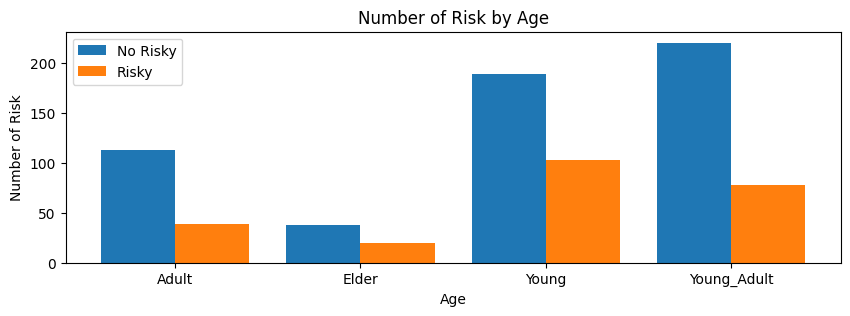

In [53]:
def age_transform(value):
    if value <= 29: value = 'Young'
    elif value <= 40 : value = 'Young_Adult'
    elif value <55: value = 'Adult'
    elif value <80: value = 'Elder'
    else:
        value = 'Diff'
    return value

customers['Age'] = customers['Age'].map(age_transform)
bar_plot(customers,'Age')

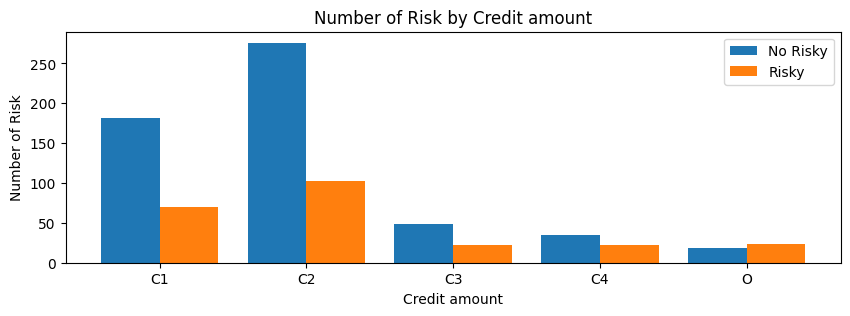

In [54]:
def credit_transform(value):
    if value <= 1500: value = 'C1'
    elif value <4500 : value = "C2"
    elif value <6500: value = 'C3'
    elif value <8500: value = 'C4'
    else:
        value = "O"
    return value

customers['Credit amount'] = customers['Credit amount'].map(credit_transform)
bar_plot(customers,'Credit amount')